In [1]:
# Load "autoreload" extension so that code can change; set it so modules are reloaded before execution
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Numerical: frequencies to EFG

In [16]:
#pi = np.pi
e = 1.609e-19
h = 6.62607004e-34
I = 3/2
Q = 31.4e-30#get_Q('As', 75).n
#w1 = np.array([11.77, 11.72, 11.84, 11.9])*1e6#, 11.8, 11.9])*1e6
w2 = np.array([20.57, 20.52, 20.64, 20.7])*1e6#, 20.6, 20.7])*1e6
w1 = w2 - 8.8e6
gamma = 4.5962e7/(2*np.pi)#7.292*1e6
wi = 1.6*gamma
gp = (w1 + w2)/(2*wi)
gm = (w2 - w1)/(2*wi) - 1
alpha = np.sqrt((gp**2 + gm**2)/2 - 1)
rho = 2*alpha/(gp**2 - alpha**2 - 1)
eta = np.sqrt(3*(rho**2 - 1))
wQ = alpha*wi/rho
Vzz = wQ*(4*I*(2*I - 1)*h)/(3*e*Q)
eta, Vzz/1e21

(array([0.31684921, 0.15681427, 0.44988743, 0.53492219]),
 array([2.33207357, 2.31398229, 2.35749549, 2.37937311]))

In [15]:
Vzz = 2.33225842e21
eta = 0.31803594
I = 3/2
h = 6.62607004e-34
e = 1.609e-19
Q = 31.4e-30
wQ = 3*e*Vzz*Q/(4*I*(2*I - 1)*h)
gamma = 4.596e7/(2*np.pi)
wi = 1.6*gamma
rho = np.sqrt(1 + eta**2/3)
c = 1 - 2*rho**2
s = 2*rho*np.sqrt((1 + c)/2)
alpha = wQ*rho/wi
H = 

wQ*eta*np.diag([1, -1, -1, 1])
E = np.linalg.eig(H)
E

SyntaxError: invalid syntax (<ipython-input-15-7f7c26858f2a>, line 11)

# Symbolic: EFG as a function of frequencies

sqrt(3)*sqrt(4*w_i**2*(w_1**2 + 2*w_1*w_i + w_2**2 - 2*w_2*w_i - 2*w_i**2)/(w_1*w_2 - w_1*w_i + w_2*w_i - w_i**2)**2 - 1)

h*(w_1*w_2 - w_1*w_i + w_2*w_i - w_i**2)/(Q*e*w_i)

<string>:2: RuntimeWarning: invalid value encountered in sqrt


12

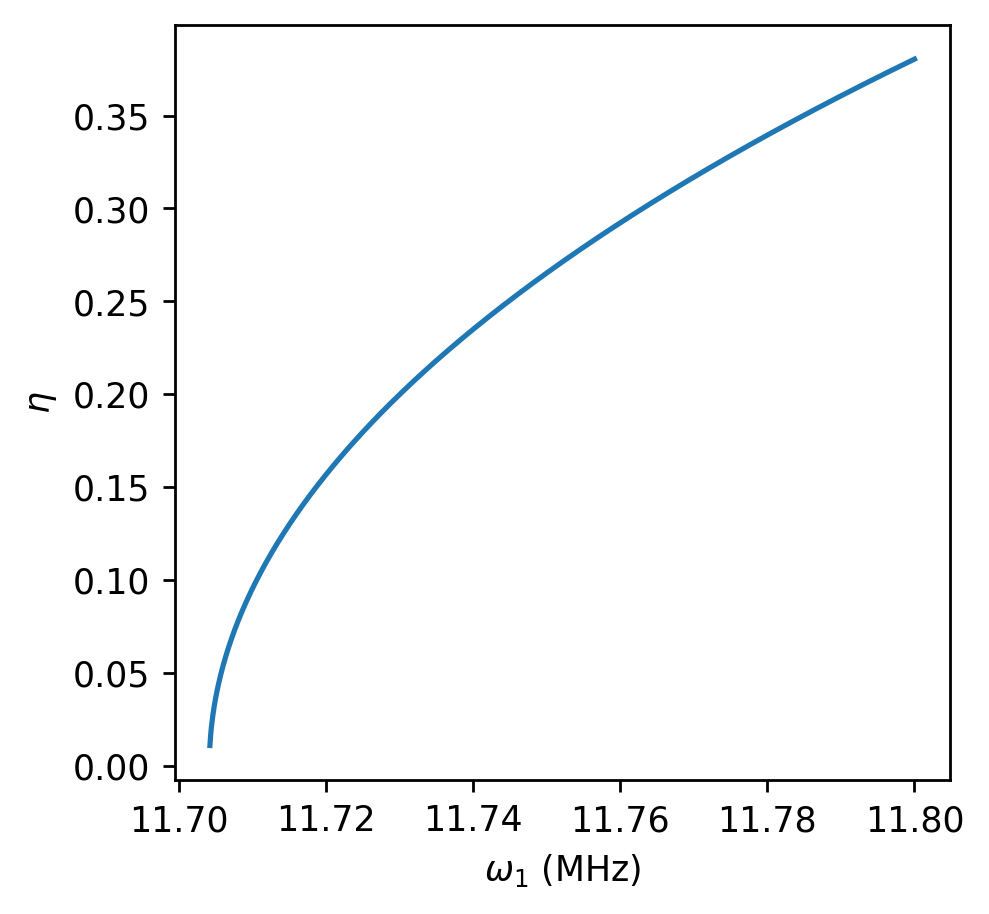

In [38]:
w1, w2, wi, h, e, Q = sp.symbols('w_1 w_2 w_i h e Q')
ev = 1.609e-19
hv = 6.62607004e-34
Qv = 0.314e-28
Bi = 1.6
gamma = 4.5962e7/(2*np.pi)
wiv = Bi*gamma
I = sp.Rational(3, 2)
gp = (w1 + w2)/(2*wi)
gm = (w2 - w1)/(2*wi) - 1
alpha = sp.simplify(sp.sqrt((gp**2 + gm**2)/2 - 1))
rho = sp.simplify(2*alpha/(gp**2 - alpha**2 - 1))
eta = sp.simplify(sp.sqrt(3*(rho**2 - 1)))
wQ = alpha*wi/rho
Vzz = wQ*(4*I*(2*I - 1)*h)/(3*e*Q)
eta_func = sp.lambdify([w1, w2, wi, Q, e, h], eta)
Vzz_func = sp.lambdify([w1, w2, wi, Q, e, h], Vzz)
display(eta, Vzz)
fig, ax = plt.subplots(figsize=(4, 4), dpi=250)
w1 = np.linspace(11.7, 11.8, 1000)*1e6
w2 = 8.8e6 + w1
ax.plot(w1/1e6, eta_func(w1, w2, Bi*gamma, Qv, ev, hv))
ax.set_xlabel(r'$\omega_1$ (MHz)')
ax.set_ylabel(r"$ \eta $")
#fig.savefig(op.join(ROOT, 'reports', 'nuclear_hamiltonian', 'high_magmom.jpg'), bbox_inches='tight')
eta_func(11.9e6, 20.7e6, wiv, Qv, ev, hv), Vzz_func(11.9e6, 20.7e6, wiv, Qv, ev, hv)
4*I*(2*I-1)

In [35]:
f1, f2, w1, w2, wi, h, e, Q = sp.symbols('f_1 f_2 w_1 w_2 w_i h e Q')
ev = 1.609e-19
hv = 6.62607004e-34
Qv = 0.314e-28
Bi = 1.6
gamma = 4.5962e7/(2*np.pi)
wiv = Bi*gamma
I = sp.Rational(3, 2)
g = {}
g[(('1/2', '3/2'), ('-1/2', '1/2'))] = ((w1 + w2)/(2*wi), (w2 - w1)/(2*wi) - 1)
g[(('-3/2', '3/2'), ('1/2', '3/2'))] = ((w1 + w2)/(2*wi) - 1, (w2 - w1)/(2*wi))

for freqs in g:
    gp, gm = g[freqs]
    alpha = sp.simplify(sp.sqrt((gp**2 + gm**2)/2 - 1))
    rho = sp.simplify(2*alpha/(gp**2 - alpha**2 - 1))
    eta = sp.simplify(sp.sqrt(3*(rho**2 - 1)))
    wQ = alpha*wi/rho
    Vzz = wQ*(4*I*(2*I - 1)*h)/(3*e*Q)
    eta_func = sp.lambdify([w1, w2, wi, Q, e, h], eta)
    Vzz_func = sp.lambdify([w1, w2, wi, Q, e, h], Vzz)
    display(eta, Vzz)
    print(eta_func(11.9e6, 20.7e6, wiv, Qv, ev, hv), Vzz_func(11.9e6, 20.7e6, wiv, Qv, ev, hv))
    print('='*80)
# fig, ax = plt.subplots()
# w1 = np.linspace(11.7, 11.8, 1000)*1e6
# w2 = 8.8e6 + w1
# ax.plot(w1/1e6, eta_func(w1, w2, Bi*gamma, Qv, ev, hv))
# eta_func(11.9e6, 20.7e6, wiv, Qv, ev, hv), Vzz_func(11.9e6, 20.7e6, wiv, Qv, ev, hv)
# 4*I*(2*I-1)

sqrt(3)*sqrt(4*w_i**2*(w_1**2 + 2*w_1*w_i + w_2**2 - 2*w_2*w_i - 2*w_i**2)/(w_1*w_2 - w_1*w_i + w_2*w_i - w_i**2)**2 - 1)

h*(w_1*w_2 - w_1*w_i + w_2*w_i - w_i**2)/(Q*e*w_i)

0.5349221933659518 2.379373113980028e+21


sqrt(3)*sqrt(-4*w_i**2*(-w_1**2 + 2*w_1*w_i - w_2**2 + 2*w_2*w_i + 2*w_i**2)/(w_1*w_2 - w_1*w_i - w_2*w_i + w_i**2)**2 - 1)

h*(w_1*w_2 - w_1*w_i - w_2*w_i + w_i**2)/(Q*e*w_i)

nan 1.974461888239798e+19


<string>:2: RuntimeWarning: invalid value encountered in sqrt


In [29]:
w1, w2, f1, f2, wi, h, e, Q = sp.symbols('w_1 w_2 f_1 f_2 w_i h e Q')
ev = 1.609e-19
hv = 6.62607004e-34
Qv = 0.314e-28
Bi = 1.6
gamma = 4.5962e7/(2*np.pi)
wiv = Bi*gamma
I = sp.Rational(3, 2)
gp = (f1 + f2)/4
gm = (f2 - f1)/4 - 1
alpha = (sp.sqrt((gp**2 + gm**2)/2 - 1))
rho = (2*alpha/(gp**2 - alpha**2 - 1))
eta = (sp.sqrt(3*(rho**2 - 1)))
wQ = alpha*wi/rho
Vzz = wQ*(4*I*(2*I - 1)*h)/(3*e*Q)
eta_func = sp.lambdify([f1, f2, Q, e, h], eta)
Vzz_func = sp.lambdify([f1, f2, Q, e, h], Vzz)
display(eta, Vzz)
# fig, ax = plt.subplots()
# w1 = np.linspace(11.7, 11.8, 1000)*1e6
# w2 = 8.8e6 + w1
# ax.plot(w1/1e6, eta_func(w1, w2, Bi*gamma, Qv, ev, hv))
eta_func(11.9e6/(wiv/2), 20.7e6/(wiv/2), Qv, ev, hv), Vzz_func(11.9e6/(wiv/2), 20.7e6/(wiv/2), Qv, ev, hv)

sqrt(-3 + 12*((f_1/4 + f_2/4)**2/2 + (-f_1/4 + f_2/4 - 1)**2/2 - 1)/((f_1/4 + f_2/4)**2/2 - (-f_1/4 + f_2/4 - 1)**2/2)**2)

2*h*w_i*((f_1/4 + f_2/4)**2/2 - (-f_1/4 + f_2/4 - 1)**2/2)/(Q*e)

(0.5349221933659536, 203293511352550.0*w_i)